# Dodge County COVID-19 Dashboard

This notebook was created to investigate the data provided by Dodge County Health Department and provide a more accurate alternative.


# References

* https://web.archive.org/web/20200101000000*/https://www.co.dodge.wi.gov/government/departments-e-m/human-services-health-department/coronavirus-information
* https://doc.wi.gov/Pages/COVID19(Coronavirus)/COVID19TestingDashboard.aspx
* https://www.dhs.wisconsin.gov/publications/p02677.pdf
* https://www.dhs.wisconsin.gov/covid-19/data-101.htm
* https://www.co.dodge.wi.gov/government/departments-e-m/human-services-health-department/coronavirus-information
* https://globalepidemics.org/key-metrics-for-covid-suppression/?fbclid=IwAR0rmBPprbrmJgIQ8lyr8_mFXQFeSWqESg8O4fAgEjAWuWWYKRmKkXQyqP8
* https://www.co.dodge.wi.gov/home/showdocument?id=38587
* 

In [1]:
# Use the Wisconsin Department of Health Services API to get data

import pandas as pd

q = "https://opendata.arcgis.com/datasets/b913e9591eae4912b33dc5b4e88646c5_10.csv?where=GEO%20%3D%20%27County%27&outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
ds = pd.read_csv(q)

In [2]:
# Select the county to display (population needed for calculations)

county = "Dodge"
county_population =  90005 #90005 = 26.665185 87839 = 27.322715  88759 = 27.039511

dc = ds[ds.NAME == county]

In [5]:
# Select the columns we're interested in and keep the top 14 most recent rows
dc_summary = dc[["DATE", "NEGATIVE", "POSITIVE", "DEATHS", "DTH_NEW", "HOSP_YES", "POS_NEW" ]].sort_values(["DATE"], ascending=False).head(20)

# Reverse the sort
dc_summary = dc_summary.sort_values(["DATE"], ascending=True)

# Add a calculated column for rolling percentage of positives
dc_summary["rolling_positive"] = (dc_summary["POSITIVE"]/(dc_summary["POSITIVE"] + dc_summary["NEGATIVE"])) * 100

# Add a calculated column for the "new cases per 100k of population" from the Harvard model
dc_summary["pos_new_rolling"] = dc_summary["POS_NEW"].rolling(7).mean()
dc_summary["new_per_100k"] = (dc_summary["pos_new_rolling"] / county_population) * 100000

In [6]:
# Print the last week's data
dc_summary.tail(7).sort_values(["DATE"], ascending=False)

,DATE,NEGATIVE,POSITIVE,DEATHS,DTH_NEW,HOSP_YES,POS_NEW,rolling_positive,pos_new_rolling,new_per_100k
13592,2020/09/19 14:00:00+00,21376.0,1573,9,0.0,89.0,35.0,6.854329,26.285714,29.204727
13561,2020/09/18 14:00:00+00,21295.0,1538,9,0.0,87.0,26.0,6.735865,24.000000,26.665185
13515,2020/09/17 14:00:00+00,21174.0,1512,9,0.0,87.0,35.0,6.664903,23.428571,26.030300
10673,2020/09/16 14:00:00+00,20973.0,1477,9,1.0,83.0,18.0,6.579065,21.571429,23.966922
12967,2020/09/15 14:00:00+00,20769.0,1459,8,0.0,81.0,42.0,6.563793,26.714286,29.680891
13367,2020/09/14 14:00:00+00,20768.0,1417,8,0.0,80.0,1.0,6.387199,22.428571,24.919251
13038,2020/09/13 14:00:00+00,20662.0,1416,8,0.0,79.0,27.0,6.413624,23.142857,25.712857


## Some misc. charts

<AxesSubplot:xlabel='DATE'>

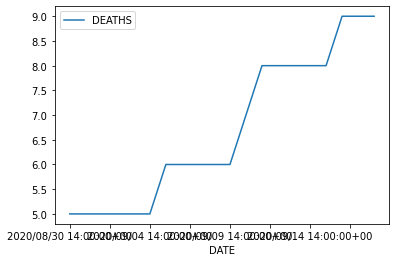

In [128]:
dc_summary.sort_values(["DATE"], ascending=True).plot(x="DATE", y="DEATHS")

<AxesSubplot:xlabel='DATE'>

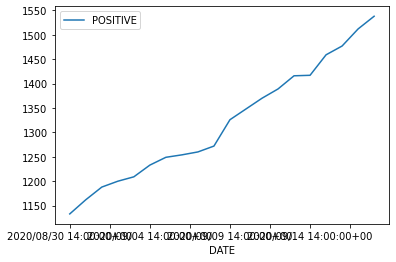

In [129]:
dc_summary.sort_values(["DATE"], ascending=True).plot(x="DATE", y="POSITIVE")

<AxesSubplot:xlabel='DATE'>

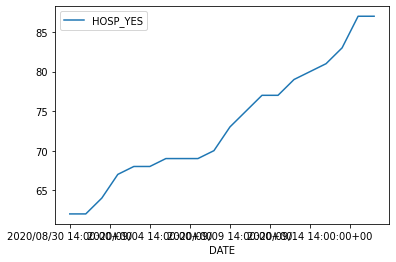

In [130]:
dc_summary.sort_values(["DATE"], ascending=True).plot(x="DATE", y="HOSP_YES")

<AxesSubplot:xlabel='DATE'>

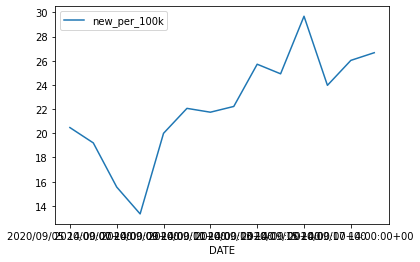

In [131]:
dc_summary.sort_values(["DATE"], ascending=True).plot(x="DATE", y="new_per_100k")